### DimeNet++ FIAÊï∞ÊçÆÈõÜÊµãËØïÈõÜËØÑ‰º∞
Áî®‰∫éËØÑ‰º∞ËÆ≠ÁªÉÂ•ΩÁöÑDimeNet++Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑÊÄßËÉΩÔºåÂåÖÊã¨ËØ¶ÁªÜÁöÑËØØÂ∑ÆÂàÜÊûêÂíåÂèØËßÜÂåñ„ÄÇ

In [1]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import yaml
import ast
from datetime import datetime

from dimenet.model.dimenet_pp import create_dimenet_pp_from_data_container
from dimenet.model.activations import swish
from dimenet.training.trainer import Trainer
from dimenet.training.metrics import Metrics
from dimenet.training.data_container import DataContainer
from dimenet.training.data_provider import DataProvider

# ËÆæÁΩÆmatplotlib‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("‚úÖ ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê")


‚úÖ ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê


In [2]:
# Âä†ËΩΩÈÖçÁΩÆÊñá‰ª∂
with open('config_pp.yaml', 'r') as c:
    config = yaml.safe_load(c)

# Ëß£ÊûêÂ≠óÁ¨¶‰∏≤ÈÖçÁΩÆ
for key, val in config.items():
    if type(val) is str:
        try:
            config[key] = ast.literal_eval(val)
        except (ValueError, SyntaxError):
            pass

print("‚úÖ ÈÖçÁΩÆÂä†ËΩΩÂÆåÊàê")
print(f"Ê®°Âûã: {config['model_name']}")
print(f"ÂÜªÁªì‰∏ªÂπ≤: {config['freeze_backbone']}")
print(f"ÊâπÊ¨°Â§ßÂ∞è: {config['batch_size']}")


‚úÖ ÈÖçÁΩÆÂä†ËΩΩÂÆåÊàê
Ê®°Âûã: dimenet++
ÂÜªÁªì‰∏ªÂπ≤: True
ÊâπÊ¨°Â§ßÂ∞è: 16


In [3]:
# ÂàõÂª∫Êï∞ÊçÆÂÆπÂô®ÂíåÊ®°Âûã
print("=== ÂàõÂª∫Êï∞ÊçÆÂÆπÂô®ÂíåÊ®°Âûã ===")

# Âä†ËΩΩFIAÊï∞ÊçÆÈõÜ
json_file = 'data/FIA49k_Al.json'
xlsx_file = 'data/FIA49k.xlsx'

# ÂàõÂª∫Êï∞ÊçÆÂÆπÂô®
data_container = DataContainer(
    json_file=json_file, 
    xlsx_file=xlsx_file, 
    cutoff=config['cutoff'], 
    target_keys=None
)

print(f"‚úÖ Êï∞ÊçÆÂÆπÂô®ÂàõÂª∫ÂÆåÊàê")
print(f"   ÁõÆÊ†áÈîÆ: {data_container.target_keys}")
print(f"   Êï∞ÊçÆÈáè: {len(data_container)}")
print(f"   ÁõÆÊ†áÂÄºÂΩ¢Áä∂: {data_container.targets.shape}")

# ÂàõÂª∫DimeNet++Ê®°Âûã
model = create_dimenet_pp_from_data_container(
    data_container,
    emb_size=config['emb_size'], 
    out_emb_size=config['out_emb_size'],
    int_emb_size=config['int_emb_size'], 
    basis_emb_size=config['basis_emb_size'],
    num_blocks=config['num_blocks'], 
    num_spherical=config['num_spherical'], 
    num_radial=config['num_radial'],
    cutoff=config['cutoff'], 
    envelope_exponent=config['envelope_exponent'],
    num_before_skip=config['num_before_skip'], 
    num_after_skip=config['num_after_skip'],
    num_dense_output=config['num_dense_output'],
    activation=swish, 
    extensive=config['extensive'], 
    output_init=config['output_init'],
    freeze_backbone=config['freeze_backbone']
)

print(f"‚úÖ Ê®°ÂûãÂàõÂª∫ÂÆåÊàêÔºåÁõÆÊ†áÊï∞Èáè: {model.num_targets}")


=== ÂàõÂª∫Êï∞ÊçÆÂÆπÂô®ÂíåÊ®°Âûã ===
ÊàêÂäüÊèêÂèñ 2215 ‰∏™ÂåñÂêàÁâ©ÁöÑFIAÁõÆÊ†áÂÄº
ÁõÆÊ†áÂÄºÂΩ¢Áä∂: (2215, 4)
FIAÂàó: ['fia_gas-DSDBLYP', 'fia_gas-PBEh3c', 'fia_solv-DSDBLYP', 'fia_solv-PBEh3c']
ÁõÆÊ†áÂÄºÊ†áÂáÜÂåñÂÆåÊàê - ÂùáÂÄº: [469.7716  461.22308 282.7777  274.22876], Ê†áÂáÜÂ∑Æ: [57.100338 61.692844 47.78473  52.19486 ]
‚úÖ Êï∞ÊçÆÂÆπÂô®ÂàõÂª∫ÂÆåÊàê
   ÁõÆÊ†áÈîÆ: ['fia_gas-DSDBLYP', 'fia_gas-PBEh3c', 'fia_solv-DSDBLYP', 'fia_solv-PBEh3c']
   Êï∞ÊçÆÈáè: 2215
   ÁõÆÊ†áÂÄºÂΩ¢Áä∂: (2215, 4)
Ê†πÊçÆÊï∞ÊçÆÂÆπÂô®ÂàõÂª∫Ê®°ÂûãÔºåÁõÆÊ†áÊï∞Èáè: 4
ÁõÆÊ†áÈîÆ: ['fia_gas-DSDBLYP', 'fia_gas-PBEh3c', 'fia_solv-DSDBLYP', 'fia_solv-PBEh3c']
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

‰∏ªÂπ≤ÁΩëÁªúÂ∑≤ÂÜªÁªìÔºåÂè™ËÆ≠ÁªÉËæìÂá∫Â§¥
‰∏ªÂπ≤ÁΩëÁªúÂ∑≤ÂÜªÁªìÔºåÂè™ËÆ≠ÁªÉËæìÂá∫Â§¥
‚úÖ Ê®°ÂûãÂàõÂª∫ÂÆåÊàêÔºåÁõÆÊ†áÊï∞Èáè: 4


In [4]:
# ÊûÑÂª∫Ê®°ÂûãÂíåÂàõÂª∫ËÆ≠ÁªÉÂô®
print("=== ÊûÑÂª∫Ê®°ÂûãÂíåÂàõÂª∫ËÆ≠ÁªÉÂô® ===")

# ÊûÑÂª∫Ê®°ÂûãÔºàÈÄöËøáÂâçÂêë‰º†Êí≠Ôºâ
data_provider = DataProvider(
    data_container, 
    config['num_train'], 
    config['num_valid'], 
    config['batch_size'],
    seed=config['data_seed'], 
    randomized=True
)
train_dataset = data_provider.get_dataset('train').prefetch(tf.data.experimental.AUTOTUNE)
train_dataset_iter = iter(train_dataset)
inputs, targets = next(train_dataset_iter)
_ = model(inputs)  # ÊûÑÂª∫Ê®°Âûã

print("‚úÖ Ê®°ÂûãÊûÑÂª∫ÂÆåÊàê")
print(f"   Ê®°ÂûãÂèÇÊï∞ÊÄªÊï∞: {model.count_params():,}")
print(f"   ÂèØËÆ≠ÁªÉÂèÇÊï∞Êï∞Èáè: {model.get_trainable_params_count():,}")

# ÂàõÂª∫ËÆ≠ÁªÉÂô®
trainer = Trainer(
    model, 
    config['learning_rate'], 
    config['warmup_steps'],
    config['decay_steps'], 
    config['decay_rate'],
    ema_decay=config['ema_decay'], 
    max_grad_norm=1000,
    freeze_backbone=config['freeze_backbone']
)

print("‚úÖ ËÆ≠ÁªÉÂô®ÂàõÂª∫ÂÆåÊàê")


=== ÊûÑÂª∫Ê®°ÂûãÂíåÂàõÂª∫ËÆ≠ÁªÉÂô® ===
FIAÁõÆÊ†áÂÄºÂΩ¢Áä∂: [None, 4]
FIAÁõÆÊ†áÈîÆ: ['fia_gas-DSDBLYP', 'fia_gas-PBEh3c', 'fia_solv-DSDBLYP', 'fia_solv-PBEh3c']
ÁõÆÊ†áÂÄºÊï∞Èáè: 4
FIAÁõÆÊ†áÂÄºÂΩ¢Áä∂: (16, 4)
FIAÁõÆÊ†áÂÄºÁ§∫‰æã: [[-0.07125839  0.03458285  0.03160409  0.14777401]
 [ 0.02963555  0.09814543 -0.43191    -0.3118239 ]]


2025-09-25 10:08:04.665771: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/anaconda3/envs/lewis_acid_env/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


‚úÖ Ê®°ÂûãÊûÑÂª∫ÂÆåÊàê
   Ê®°ÂûãÂèÇÊï∞ÊÄªÊï∞: 1,889,670
   ÂèØËÆ≠ÁªÉÂèÇÊï∞Êï∞Èáè: 1,159,680
‚úÖ ËÆ≠ÁªÉÂô®ÂàõÂª∫ÂÆåÊàê


In [5]:
# Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç
print("=== Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç ===")

best_ckpt_file = 'logs_20250922_234938/best_ckpt'
best_loss_file = 'logs_20250922_234938/best_loss.npz'

if os.path.exists(best_ckpt_file + '.index'):
    print(f"üìÇ Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç: {best_ckpt_file}")
    model.load_weights(best_ckpt_file)
    print("‚úÖ ÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáçÂä†ËΩΩÂÆåÊàê")
else:
    print("‚ùå Êú™ÊâæÂà∞ÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáçÊñá‰ª∂")
    raise FileNotFoundError("ÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáçÊñá‰ª∂‰∏çÂ≠òÂú®")

# Âä†ËΩΩÊúÄ‰Ω≥È™åËØÅÊåáÊ†á
if os.path.exists(best_loss_file):
    best_metrics = np.load(best_loss_file)
    print("‚úÖ ÊúÄ‰Ω≥È™åËØÅÊåáÊ†á:")
    for key in best_metrics.keys():
        print(f"   {key}: {best_metrics[key]:.6f}")
else:
    print("‚ùå Êú™ÊâæÂà∞ÊúÄ‰Ω≥È™åËØÅÊåáÊ†áÊñá‰ª∂")
    best_metrics = None


=== Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç ===
üìÇ Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç: logs_20250922_234938/best_ckpt
‚úÖ ÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáçÂä†ËΩΩÂÆåÊàê
‚úÖ ÊúÄ‰Ω≥È™åËØÅÊåáÊ†á:
   loss_val: 1.260777
   mean_mae_val: 1.260777
   mean_log_mae_val: 0.230993
   fia_gas-DSDBLYP_val: 1.231221
   fia_gas-PBEh3c_val: 1.288636
   fia_solv-DSDBLYP_val: 1.199614
   fia_solv-PBEh3c_val: 1.323637
   step: 48000.000000


In [6]:
# Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã
print("=== ÊµãËØïÈõÜËØÑ‰º∞ ===")

def evaluate_on_test_set_detailed(model, data_provider, batch_size, trainer, max_batches=None):
    """Âú®ÊµãËØïÈõÜ‰∏äËØ¶ÁªÜËØÑ‰º∞Ê®°Âûã"""
    test_dataset = data_provider.get_dataset('test').prefetch(tf.data.experimental.AUTOTUNE)
    test_dataset_iter = iter(test_dataset)
    test_metrics = Metrics('test', data_provider.data_container.target_keys)
    
    num_test = data_provider.nsamples['test']
    if max_batches is None:
        num_batches = int(np.ceil(num_test / batch_size))
    else:
        num_batches = min(int(np.ceil(num_test / batch_size)), max_batches)
    
    print(f"ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {num_test}")
    print(f"ËØÑ‰º∞ÊâπÊ¨°Êï∞: {num_batches}")
    
    # Êî∂ÈõÜÊâÄÊúâÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº
    all_predictions = []
    all_targets = []
    
    for i in range(num_batches):
        try:
            inputs, targets = next(test_dataset_iter)
            preds = model(inputs, training=False)
            loss, mae = trainer.compute_loss(targets, preds)
            nsamples = tf.shape(preds)[0]
            test_metrics.update_state(loss, loss, mae, nsamples)
            
            # Êî∂ÈõÜÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº
            all_predictions.append(preds.numpy())
            all_targets.append(targets.numpy())
            
            if (i + 1) % 5 == 0:
                print(f"  Â∑≤Â§ÑÁêÜ {i + 1}/{num_batches} ÊâπÊ¨°")
                
        except StopIteration:
            break
        except Exception as e:
            print(f"ÊµãËØïÊâπÊ¨° {i} Âá∫Èîô: {e}")
            break
    
    # ËÆ°ÁÆóÊØè‰∏™ÁõÆÊ†áÁöÑËØ¶ÁªÜMAE
    if all_predictions and all_targets:
        all_predictions = np.concatenate(all_predictions, axis=0)
        all_targets = np.concatenate(all_targets, axis=0)
        
        # ËÆ°ÁÆóÊØè‰∏™ÁõÆÊ†áÁöÑMAE
        target_maes = []
        for i in range(all_targets.shape[1]):
            target_mae = np.mean(np.abs(all_predictions[:, i] - all_targets[:, i]))
            target_maes.append(target_mae)
        
        # Â∞ÜËØ¶ÁªÜÁªìÊûúÊ∑ªÂä†Âà∞metricsÂØπË±°
        test_metrics.target_maes = target_maes
        test_metrics.all_predictions = all_predictions
        test_metrics.all_targets = all_targets
    
    return test_metrics

# ÊâßË°åÊµãËØïÈõÜËØÑ‰º∞
test_metrics = evaluate_on_test_set_detailed(
    model, 
    data_provider, 
    config['batch_size'], 
    trainer, 
    max_batches=None  # ËØÑ‰º∞ÊâÄÊúâÊâπÊ¨°
)

print("‚úÖ ÊµãËØïÈõÜËØÑ‰º∞ÂÆåÊàê")


=== ÊµãËØïÈõÜËØÑ‰º∞ ===
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 215
ËØÑ‰º∞ÊâπÊ¨°Êï∞: 14
  Â∑≤Â§ÑÁêÜ 5/14 ÊâπÊ¨°
  Â∑≤Â§ÑÁêÜ 10/14 ÊâπÊ¨°
‚úÖ ÊµãËØïÈõÜËØÑ‰º∞ÂÆåÊàê


In [7]:
# ÊòæÁ§∫ÊµãËØïÁªìÊûú
print("=== ÊµãËØïÈõÜËØÑ‰º∞ÁªìÊûú ===")
print(f"ÊµãËØïÊçüÂ§±: {test_metrics.loss:.6f}")
print(f"ÊµãËØïMAE: {test_metrics.mean_mae:.6f}")

print("\nÂêÑÁõÆÊ†áËØ¶ÁªÜÁªìÊûú:")
if hasattr(test_metrics, 'target_maes'):
    for i, target_key in enumerate(data_container.target_keys):
        target_mae = test_metrics.target_maes[i]
        print(f"   {target_key}: MAE = {target_mae:.6f}")

# ‰∏éÈ™åËØÅÈõÜÁªìÊûúÂØπÊØî
if best_metrics is not None:
    print(f"\n=== È™åËØÅÈõÜ vs ÊµãËØïÈõÜÂØπÊØî ===")
    print(f"È™åËØÅÈõÜMAE: {best_metrics['mean_mae_val']:.6f}")
    print(f"ÊµãËØïÈõÜMAE: {test_metrics.mean_mae:.6f}")
    print(f"ÊÄßËÉΩÂ∑ÆÂºÇ: {abs(test_metrics.mean_mae - best_metrics['mean_mae_val']):.6f}")
    
    print(f"\nÂêÑÁõÆÊ†áËØ¶ÁªÜÂØπÊØî:")
    for i, target_key in enumerate(data_container.target_keys):
        val_mae = best_metrics[f'{target_key}_val']
        test_mae = test_metrics.target_maes[i]
        diff = abs(test_mae - val_mae)
        status = "‚úÖ" if test_mae <= val_mae else "‚ö†Ô∏è"
        print(f"   {target_key}:")
        print(f"     È™åËØÅÈõÜMAE: {val_mae:.6f}")
        print(f"     ÊµãËØïÈõÜMAE: {test_mae:.6f} {status}")
        print(f"     Â∑ÆÂºÇ: {diff:.6f}")


=== ÊµãËØïÈõÜËØÑ‰º∞ÁªìÊûú ===
ÊµãËØïÊçüÂ§±: 1.170500
ÊµãËØïMAE: 1.170500

ÂêÑÁõÆÊ†áËØ¶ÁªÜÁªìÊûú:
   fia_gas-DSDBLYP: MAE = 1.003684
   fia_gas-PBEh3c: MAE = 1.174252
   fia_solv-DSDBLYP: MAE = 1.295309
   fia_solv-PBEh3c: MAE = 1.208752

=== È™åËØÅÈõÜ vs ÊµãËØïÈõÜÂØπÊØî ===
È™åËØÅÈõÜMAE: 1.260777
ÊµãËØïÈõÜMAE: 1.170500
ÊÄßËÉΩÂ∑ÆÂºÇ: 0.090278

ÂêÑÁõÆÊ†áËØ¶ÁªÜÂØπÊØî:
   fia_gas-DSDBLYP:
     È™åËØÅÈõÜMAE: 1.231221
     ÊµãËØïÈõÜMAE: 1.003684 ‚úÖ
     Â∑ÆÂºÇ: 0.227537
   fia_gas-PBEh3c:
     È™åËØÅÈõÜMAE: 1.288636
     ÊµãËØïÈõÜMAE: 1.174252 ‚úÖ
     Â∑ÆÂºÇ: 0.114384
   fia_solv-DSDBLYP:
     È™åËØÅÈõÜMAE: 1.199614
     ÊµãËØïÈõÜMAE: 1.295309 ‚ö†Ô∏è
     Â∑ÆÂºÇ: 0.095696
   fia_solv-PBEh3c:
     È™åËØÅÈõÜMAE: 1.323637
     ÊµãËØïÈõÜMAE: 1.208752 ‚úÖ
     Â∑ÆÂºÇ: 0.114885


=== ÂàõÂª∫ÊÄßËÉΩÂØπÊØîÂèØËßÜÂåñ ===


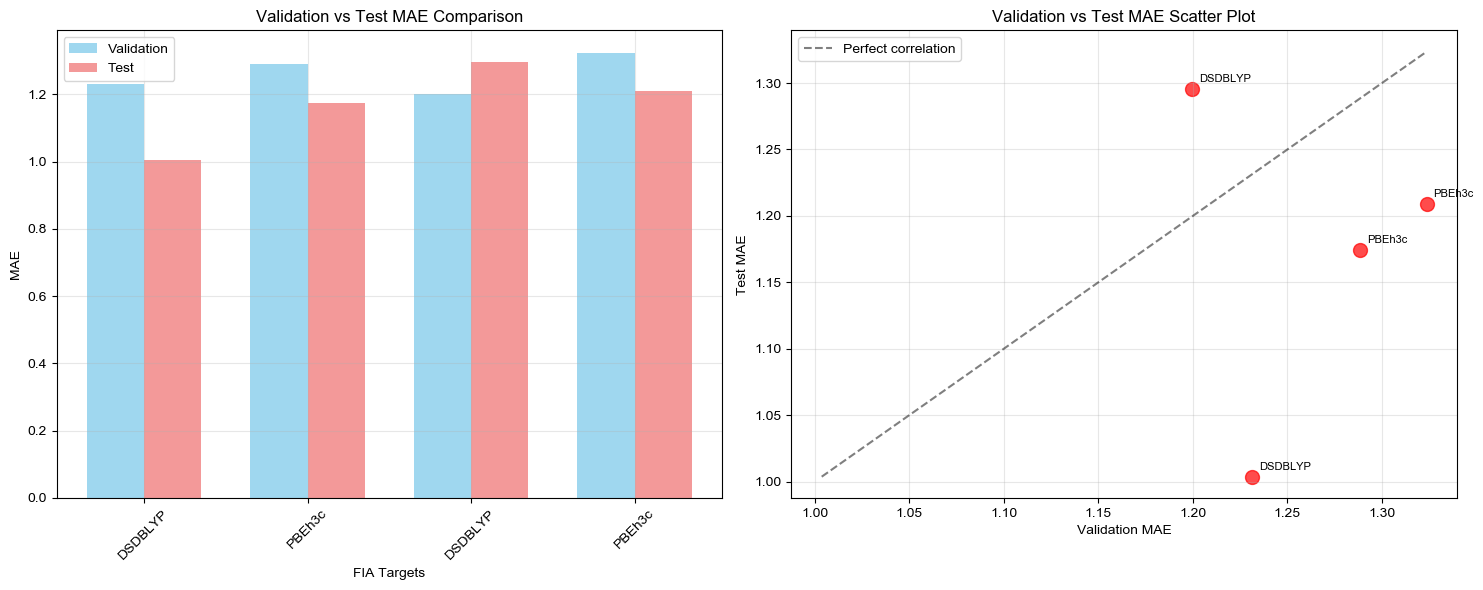

‚úÖ ÊÄßËÉΩÂØπÊØîÂõæÂàõÂª∫ÂÆåÊàê


In [8]:
# ÂàõÂª∫ÊÄßËÉΩÂØπÊØîÂèØËßÜÂåñ
if hasattr(test_metrics, 'target_maes') and best_metrics is not None:
    print("=== ÂàõÂª∫ÊÄßËÉΩÂØπÊØîÂèØËßÜÂåñ ===")
    
    # ÂáÜÂ§áÊï∞ÊçÆ
    target_keys = data_container.target_keys
    val_maes = [best_metrics[f'{key}_val'] for key in target_keys]
    test_maes = test_metrics.target_maes
    
    # ÂàõÂª∫DataFrame
    df = pd.DataFrame({
        'Target': target_keys,
        'Validation MAE': val_maes,
        'Test MAE': test_maes
    })
    
    # ÂàõÂª∫ÂØπÊØîÂõæ
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Â≠êÂõæ1: Êü±Áä∂ÂõæÂØπÊØî
    x = np.arange(len(target_keys))
    width = 0.35
    
    ax1.bar(x - width/2, val_maes, width, label='Validation', alpha=0.8, color='skyblue')
    ax1.bar(x + width/2, test_maes, width, label='Test', alpha=0.8, color='lightcoral')
    
    ax1.set_xlabel('FIA Targets')
    ax1.set_ylabel('MAE')
    ax1.set_title('Validation vs Test MAE Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels([key.split('-')[1] for key in target_keys], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Â≠êÂõæ2: Êï£ÁÇπÂõæ
    ax2.scatter(val_maes, test_maes, s=100, alpha=0.7, c='red')
    
    # Ê∑ªÂä†ÂØπËßíÁ∫øÔºàÁêÜÊÉ≥ÊÉÖÂÜµÔºâ
    min_val = min(min(val_maes), min(test_maes))
    max_val = max(max(val_maes), max(test_maes))
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect correlation')
    
    # Ê∑ªÂä†Ê†áÁ≠æ
    for i, key in enumerate(target_keys):
        ax2.annotate(key.split('-')[1], (val_maes[i], test_maes[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    ax2.set_xlabel('Validation MAE')
    ax2.set_ylabel('Test MAE')
    ax2.set_title('Validation vs Test MAE Scatter Plot')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("‚úÖ ÊÄßËÉΩÂØπÊØîÂõæÂàõÂª∫ÂÆåÊàê")


=== ÂàõÂª∫È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæ ===


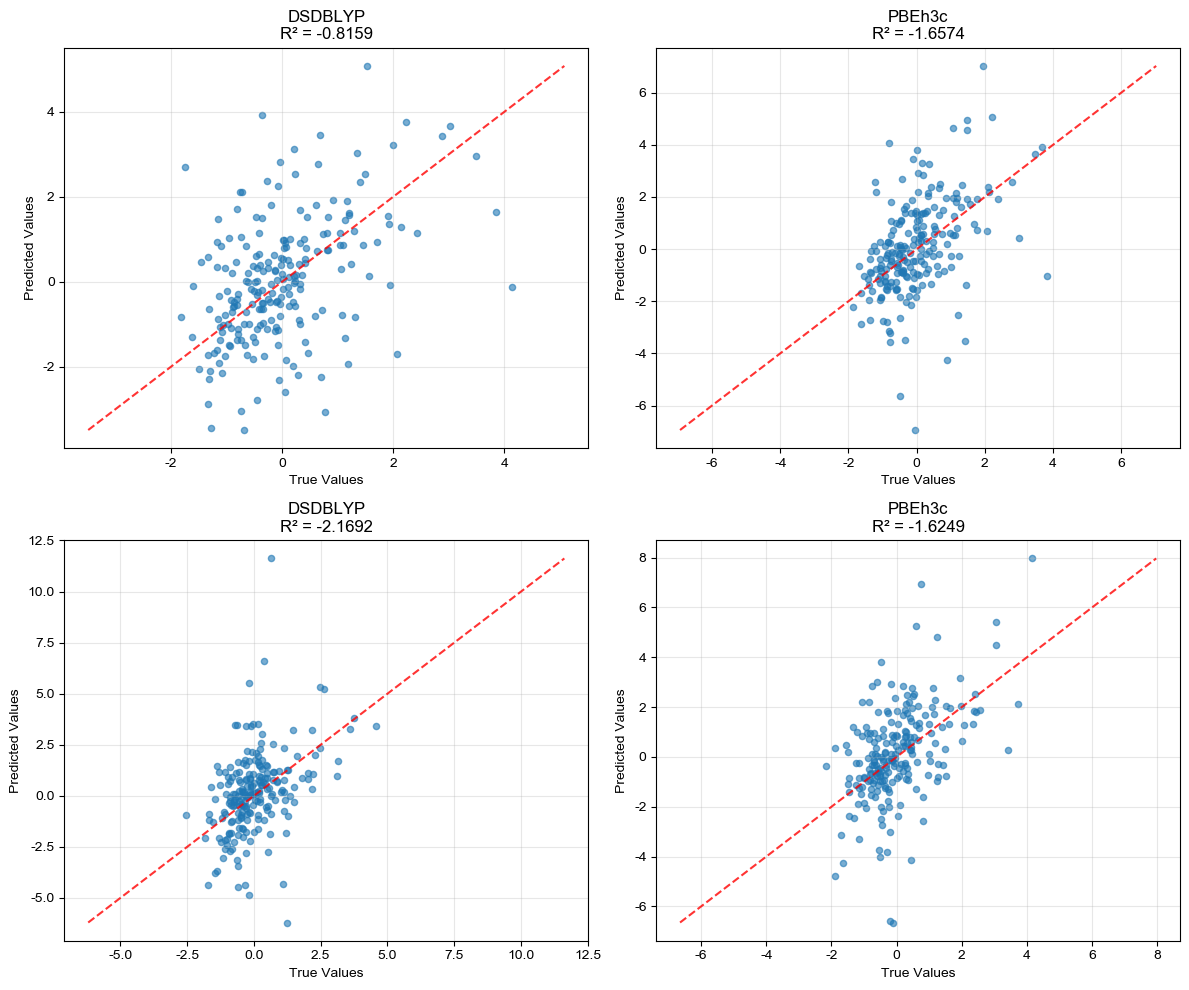

‚úÖ È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæÂàõÂª∫ÂÆåÊàê


In [9]:
# ÂàõÂª∫È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæ
if hasattr(test_metrics, 'all_predictions') and hasattr(test_metrics, 'all_targets'):
    print("=== ÂàõÂª∫È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæ ===")
    
    predictions = test_metrics.all_predictions
    targets = test_metrics.all_targets
    target_keys = data_container.target_keys
    
    # ÂàõÂª∫Â≠êÂõæ
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for i, target_key in enumerate(target_keys):
        ax = axes[i]
        
        # Êï£ÁÇπÂõæ
        ax.scatter(targets[:, i], predictions[:, i], alpha=0.6, s=20)
        
        # ÁêÜÊÉ≥ÂØπËßíÁ∫ø
        min_val = min(targets[:, i].min(), predictions[:, i].min())
        max_val = max(targets[:, i].max(), predictions[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
        
        # ËÆ°ÁÆóR¬≤
        from sklearn.metrics import r2_score
        r2 = r2_score(targets[:, i], predictions[:, i])
        
        ax.set_xlabel('True Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{target_key.split("-")[1]}\nR¬≤ = {r2:.4f}')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("‚úÖ È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæÂàõÂª∫ÂÆåÊàê")


In [10]:
# ÁîüÊàêËØ¶ÁªÜÁöÑÂàÜÊûêÊä•Âëä
print("=" * 80)
print("üî¨ DimeNet++ FIAÊï∞ÊçÆÈõÜÊµãËØïÈõÜËØÑ‰º∞Êä•Âëä")
print("=" * 80)

print("\nüìä Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ:")
print(f"   ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {data_provider.nsamples['test']}")
print(f"   È™åËØÅÈõÜÊ†∑Êú¨Êï∞: {data_provider.nsamples['val']}")
print(f"   ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: {data_provider.nsamples['train']}")
print(f"   ÁõÆÊ†áÊï∞Èáè: {len(data_container.target_keys)}")

print("\nüìà Ê®°ÂûãÊÄßËÉΩÊÄªÁªì:")
if best_metrics is not None:
    print(f"   È™åËØÅÈõÜMAE: {best_metrics['mean_mae_val']:.6f}")
print(f"   ÊµãËØïÈõÜMAE: {test_metrics.mean_mae:.6f}")
if best_metrics is not None:
    diff = abs(test_metrics.mean_mae - best_metrics['mean_mae_val'])
    print(f"   ÊÄßËÉΩÂ∑ÆÂºÇ: {diff:.6f}")
    print(f"   Ê≥õÂåñÊÄßËÉΩ: {'‰ºòÁßÄ' if diff < 0.1 else 'ËâØÂ•Ω' if diff < 0.2 else 'ÈúÄË¶ÅÊîπËøõ'}")

print("\nüéØ ÂêÑÁõÆÊ†áËØ¶ÁªÜÊÄßËÉΩ:")
if hasattr(test_metrics, 'target_maes'):
    better_count = 0
    for i, target_key in enumerate(data_container.target_keys):
        test_mae = test_metrics.target_maes[i]
        if best_metrics is not None:
            val_mae = best_metrics[f'{target_key}_val']
            status = "‚úÖ" if test_mae <= val_mae else "‚ö†Ô∏è"
            if test_mae <= val_mae:
                better_count += 1
            print(f"   {target_key}: ÊµãËØïÈõÜMAE = {test_mae:.6f} {status}")
        else:
            print(f"   {target_key}: ÊµãËØïÈõÜMAE = {test_mae:.6f}")
    
    if best_metrics is not None:
        print(f"\nüìä ÊÄßËÉΩÂàÜÊûê:")
        print(f"   ÊµãËØïÈõÜË°®Áé∞Êõ¥Â•ΩÁöÑÁõÆÊ†á: {better_count}/{len(data_container.target_keys)}")
        print(f"   Êï¥‰ΩìÊ≥õÂåñÊÄßËÉΩ: {'‰ºòÁßÄ' if better_count >= 3 else 'ËâØÂ•Ω' if better_count >= 2 else 'ÈúÄË¶ÅÊîπËøõ'}")

print("\nüí° ÁªìËÆ∫ÂíåÂª∫ËÆÆ:")
if best_metrics is not None and test_metrics.mean_mae < best_metrics['mean_mae_val']:
    print("   ‚úÖ Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äË°®Áé∞‰ºòÂºÇÔºåÊ≥õÂåñËÉΩÂäõËâØÂ•Ω")
    print("   ‚úÖ ÂèØ‰ª•ÊîæÂøÉÈÉ®ÁΩ≤‰ΩøÁî®")
    print("   üí° Âª∫ËÆÆ: ÂèØ‰ª•ËÄÉËôëÂú®ÂÆûÈôÖÂ∫îÁî®‰∏≠Ëøõ‰∏ÄÊ≠•‰ºòÂåñ")
else:
    print("   ‚ö†Ô∏è Ê®°ÂûãÂèØËÉΩÂ≠òÂú®ËΩªÂæÆËøáÊãüÂêà")
    print("   üí° Âª∫ËÆÆ: ËÄÉËôëÂ¢ûÂä†Ê≠£ÂàôÂåñÊàñÊï∞ÊçÆÂ¢ûÂº∫")

print("\n" + "=" * 80)
print("üìã Êä•ÂëäÁîüÊàêÂÆåÊàê")
print("=" * 80)


üî¨ DimeNet++ FIAÊï∞ÊçÆÈõÜÊµãËØïÈõÜËØÑ‰º∞Êä•Âëä

üìä Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ:
   ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 215
   È™åËØÅÈõÜÊ†∑Êú¨Êï∞: 400
   ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 1600
   ÁõÆÊ†áÊï∞Èáè: 4

üìà Ê®°ÂûãÊÄßËÉΩÊÄªÁªì:
   È™åËØÅÈõÜMAE: 1.260777
   ÊµãËØïÈõÜMAE: 1.170500
   ÊÄßËÉΩÂ∑ÆÂºÇ: 0.090278
   Ê≥õÂåñÊÄßËÉΩ: ‰ºòÁßÄ

üéØ ÂêÑÁõÆÊ†áËØ¶ÁªÜÊÄßËÉΩ:
   fia_gas-DSDBLYP: ÊµãËØïÈõÜMAE = 1.003684 ‚úÖ
   fia_gas-PBEh3c: ÊµãËØïÈõÜMAE = 1.174252 ‚úÖ
   fia_solv-DSDBLYP: ÊµãËØïÈõÜMAE = 1.295309 ‚ö†Ô∏è
   fia_solv-PBEh3c: ÊµãËØïÈõÜMAE = 1.208752 ‚úÖ

üìä ÊÄßËÉΩÂàÜÊûê:
   ÊµãËØïÈõÜË°®Áé∞Êõ¥Â•ΩÁöÑÁõÆÊ†á: 3/4
   Êï¥‰ΩìÊ≥õÂåñÊÄßËÉΩ: ‰ºòÁßÄ

üí° ÁªìËÆ∫ÂíåÂª∫ËÆÆ:
   ‚úÖ Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äË°®Áé∞‰ºòÂºÇÔºåÊ≥õÂåñËÉΩÂäõËâØÂ•Ω
   ‚úÖ ÂèØ‰ª•ÊîæÂøÉÈÉ®ÁΩ≤‰ΩøÁî®
   üí° Âª∫ËÆÆ: ÂèØ‰ª•ËÄÉËôëÂú®ÂÆûÈôÖÂ∫îÁî®‰∏≠Ëøõ‰∏ÄÊ≠•‰ºòÂåñ

üìã Êä•ÂëäÁîüÊàêÂÆåÊàê


In [ ]:
# ‰øùÂ≠òÊµãËØïÁªìÊûú
print("=== ‰øùÂ≠òÊµãËØïÁªìÊûú ===")

test_results = {
    'test_loss': test_metrics.loss,
    'test_mae': test_metrics.mean_mae,
    'target_keys': data_container.target_keys,
    'num_test_samples': data_provider.nsamples['test']
}

# Ê∑ªÂä†ÂêÑÁõÆÊ†áÁöÑMAE
if hasattr(test_metrics, 'target_maes'):
    for i, target_key in enumerate(data_container.target_keys):
        test_results[f'{target_key}_mae'] = test_metrics.target_maes[i]

# Ê∑ªÂä†È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÔºàÂèØÈÄâÔºåÊñá‰ª∂‰ºöÊØîËæÉÂ§ßÔºâ
if hasattr(test_metrics, 'all_predictions') and hasattr(test_metrics, 'all_targets'):
    test_results['predictions'] = test_metrics.all_predictions
    test_results['targets'] = test_metrics.all_targets

np.savez('detailed_test_results.npz', **test_results)
print("‚úÖ ËØ¶ÁªÜÊµãËØïÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: detailed_test_results.npz")

print("\nüéØ ÊµãËØïÈõÜËØÑ‰º∞ÂÆåÊàêÔºÅÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠ò„ÄÇ")
